In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

In [2]:
import csv

In [3]:
def read_log(path_to_log):
    size = []
    load = []
    unload = []

    with open(path_to_log, "r") as log:
        reader = csv.reader(log, delimiter=",")

        for r in reader:
            size.append(int(r[0]))
            unload.append(float(r[1]))
            load.append(float(r[2]))
    
    return size, load, unload

In [4]:
plain = read_log("../sample_data/storage_benchmark/bench_plain.log")
plain_b = read_log("../sample_data/storage_benchmark/bench_plain_byte.log")
sqlite = read_log("../sample_data/storage_benchmark/bench_sqlite.log")
sqlite_b = read_log("../sample_data/storage_benchmark/bench_sqlite_byte.log")
mmap_b = read_log("../sample_data/storage_benchmark/bench_mmap_byte.log")

<IPython.core.display.Javascript object>


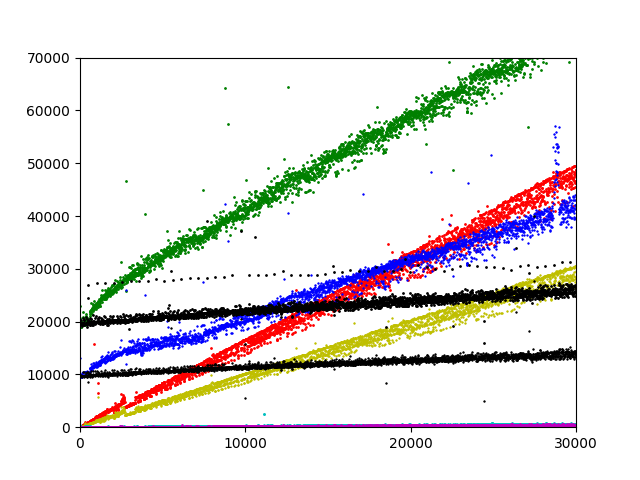

In [5]:
import matplotlib.ticker as ticker

plt.figure()

ax = plt.subplot(1, 1, 1)

plt.ylim(0, 70000)
plt.xlim(1, 30000)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))
ax.plot(sqlite[0], sqlite[1], "go", ms=1)
ax.plot(plain[0], plain[1], "ro", ms=1)
ax.plot(sqlite[0], sqlite[2], "b+", ms=1)
ax.plot(plain[0], plain[2], "y+", ms=1)
ax.plot(sqlite_b[0], sqlite_b[1], "ko", ms=1)
ax.plot(sqlite_b[0], sqlite_b[2], "k+", ms=1)
ax.plot(plain_b[0], plain_b[1], "co", ms=1)
ax.plot(plain_b[0], plain_b[2], "c+", ms=1)
ax.plot(mmap_b[0], mmap_b[1], "mo", ms=1)
ax.plot(mmap_b[0], mmap_b[2], "m+", ms=1)

<IPython.core.display.Javascript object>


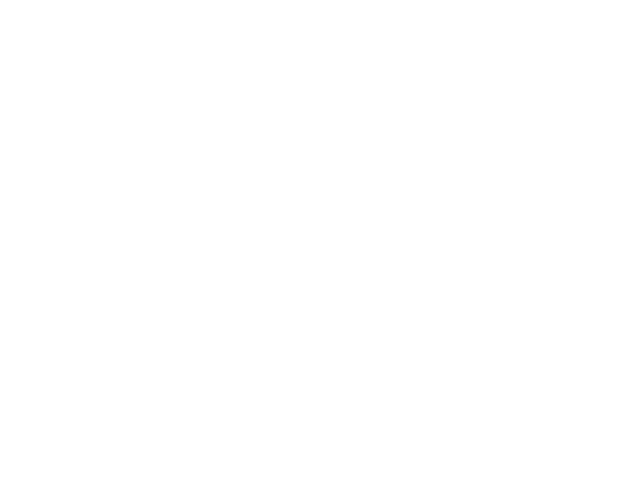

<IPython.core.display.Javascript object>


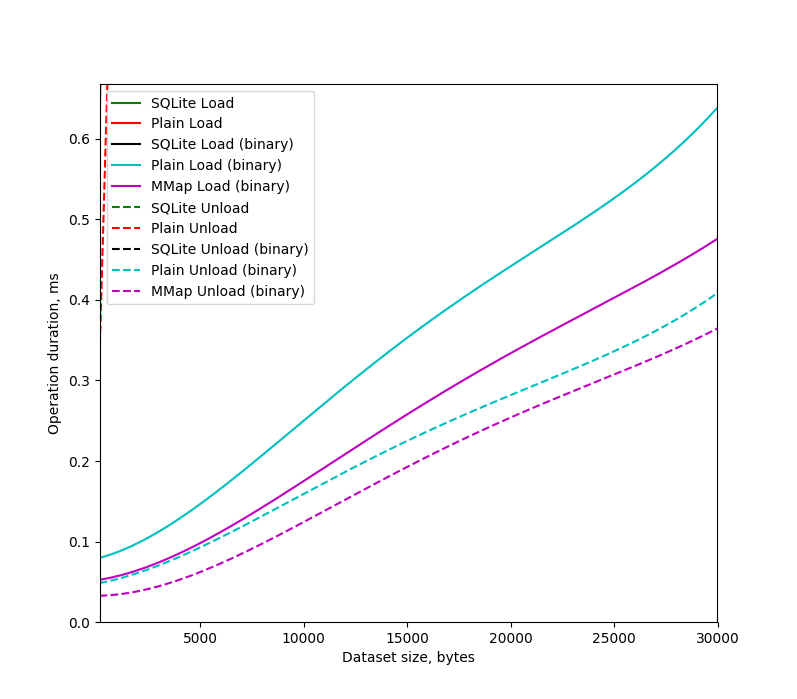

Text(0, 0.5, 'Operation duration, ms')

In [7]:
import numpy as np

plt.figure()

%matplotlib notebook

ax = plt.subplot(1, 1, 1)

plt.ylim(0, 90)
plt.xlim(1, 30000)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(5000))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))
ax.plot(sqlite[0], np.poly1d(np.polyfit(sqlite[0], sqlite[1], 4))(sqlite[0]) / 1000, "g")
ax.plot(plain[0], np.poly1d(np.polyfit(plain[0], plain[1], 4))(plain[0]) / 1000, "r", ms=1)
ax.plot(sqlite_b[0], np.poly1d(np.polyfit(sqlite_b[0], sqlite_b[1], 4))(sqlite_b[0]) / 1000, "k", ms=1)
ax.plot(plain_b[0], np.poly1d(np.polyfit(plain_b[0], plain_b[1], 4))(plain_b[0]) / 1000, "c", ms=1)
ax.plot(mmap_b[0], np.poly1d(np.polyfit(mmap_b[0], mmap_b[1], 4))(mmap_b[0]) / 1000, "m", ms=1)
ax.plot(sqlite[0], np.poly1d(np.polyfit(sqlite[0], sqlite[2], 4))(sqlite[0]) / 1000, "g--", ms=1)
ax.plot(plain[0], np.poly1d(np.polyfit(plain[0], plain[2], 4))(plain[0]) / 1000, "r--", ms=1)
ax.plot(sqlite_b[0], np.poly1d(np.polyfit(sqlite_b[0], sqlite_b[2], 4))(sqlite_b[0]) / 1000, "k--", ms=1)
ax.plot(plain_b[0], np.poly1d(np.polyfit(plain_b[0], plain_b[2], 4))(plain_b[0]) / 1000, "c--", ms=1)
ax.plot(mmap_b[0], np.poly1d(np.polyfit(mmap_b[0], mmap_b[2], 4))(mmap_b[0]) / 1000, "m--", ms=1)
plt.legend([
    "SQLite Load",
    "Plain Load",
    "SQLite Load (binary)",
    "Plain Load (binary)",
    "MMap Load (binary)",
    "SQLite Unload",
    "Plain Unload",
    "SQLite Unload (binary)",
    "Plain Unload (binary)",
    "MMap Unload (binary)",
])
plt.xlabel("Dataset size, bytes")
plt.ylabel("Operation duration, ms")

<IPython.core.display.Javascript object>


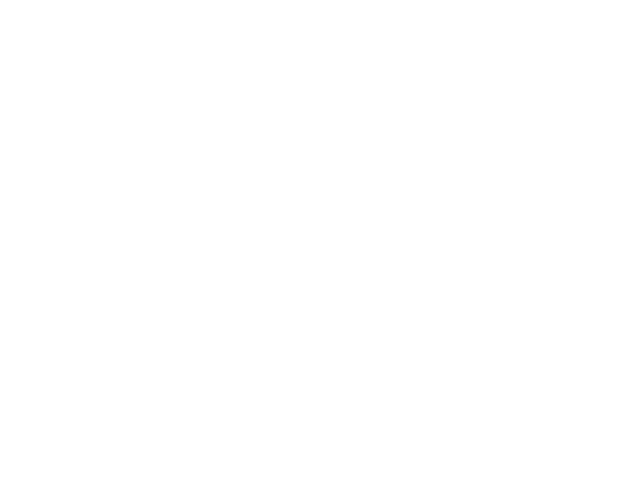

<IPython.core.display.Javascript object>


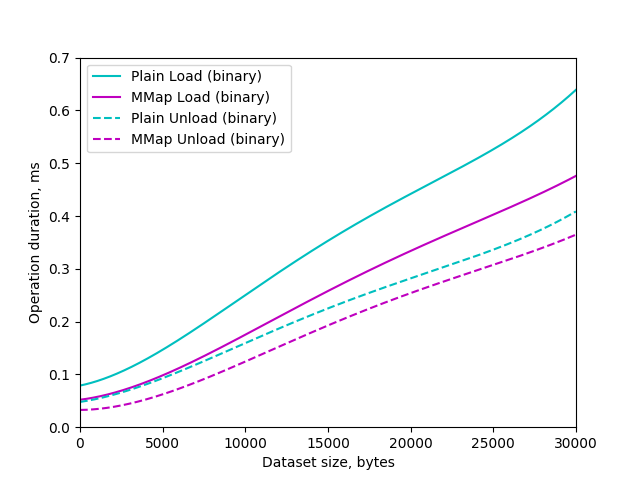

Text(0, 0.5, 'Operation duration, ms')

In [6]:
import numpy as np

plt.figure()

%matplotlib notebook

ax = plt.subplot(1, 1, 1)

plt.ylim(0, 0.7)
plt.xlim(1, 30000)
ax.plot(plain_b[0], np.poly1d(np.polyfit(plain_b[0], plain_b[1], 4))(plain_b[0]) / 1000, "c", ms=1)
ax.plot(mmap_b[0], np.poly1d(np.polyfit(mmap_b[0], mmap_b[1], 4))(mmap_b[0]) / 1000, "m", ms=1)
ax.plot(plain_b[0], np.poly1d(np.polyfit(plain_b[0], plain_b[2], 4))(plain_b[0]) / 1000, "c--", ms=1)
ax.plot(mmap_b[0], np.poly1d(np.polyfit(mmap_b[0], mmap_b[2], 4))(mmap_b[0]) / 1000, "m--", ms=1)
plt.legend([
    "Plain Load (binary)",
    "MMap Load (binary)",
    "Plain Unload (binary)",
    "MMap Unload (binary)",
])
plt.xlabel("Dataset size, bytes")
plt.ylabel("Operation duration, ms")

<IPython.core.display.Javascript object>


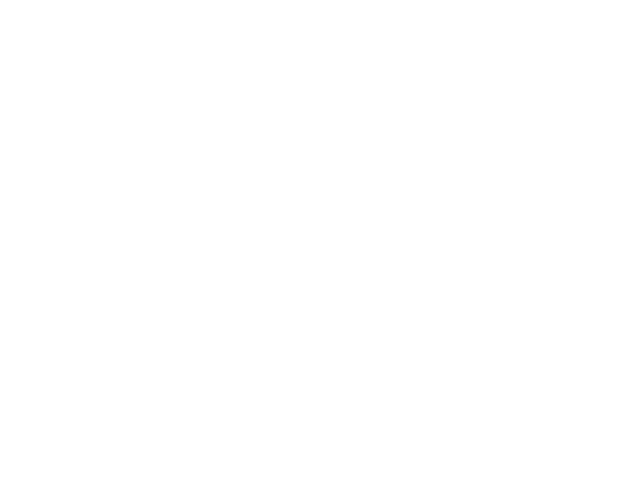

<IPython.core.display.Javascript object>


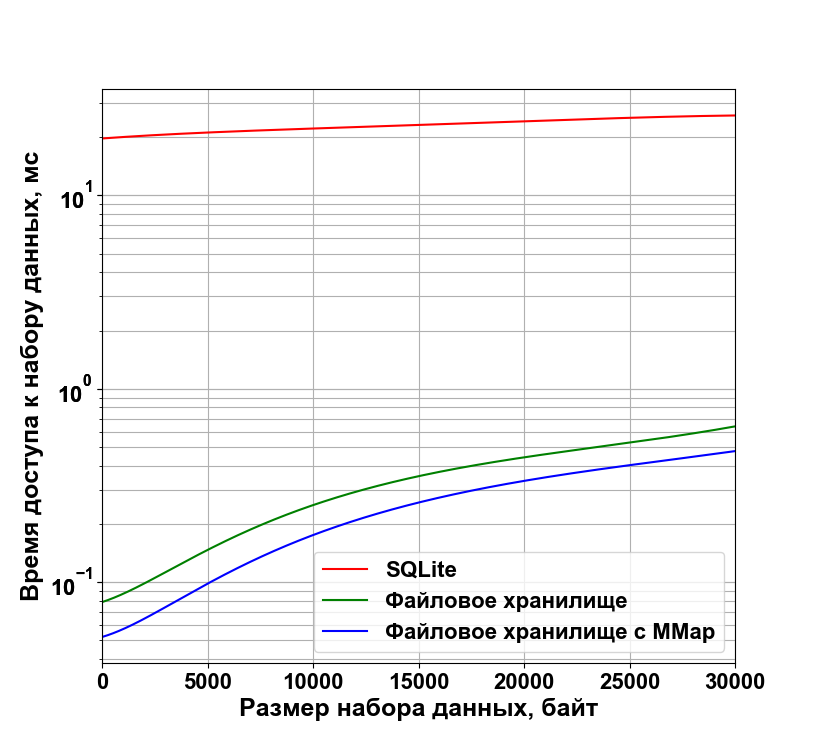

Text(0, 0.5, 'Время доступа к набору данных, мс')

In [47]:
import numpy as np
import matplotlib

matplotlib.rcParams.update({'font.size': 12})

plt.figure()

%matplotlib notebook

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

ax = plt.subplot(1, 1, 1)

plt.xlim(1, 30000)
plt.grid(which="both")
plt.yscale("log")
locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax.yaxis.set_major_locator(locmaj)
ax.plot(sqlite_b[0], np.poly1d(np.polyfit(sqlite_b[0], sqlite_b[1], 4))(sqlite_b[0]) / 1000, "r", ms=1)
ax.plot(plain_b[0], np.poly1d(np.polyfit(plain_b[0], plain_b[1], 4))(plain_b[0]) / 1000, "g", ms=1)
ax.plot(mmap_b[0], np.poly1d(np.polyfit(mmap_b[0], mmap_b[1], 4))(mmap_b[0]) / 1000, "b", ms=1)
plt.legend([
    "SQLite",
    "Файловое хранилище",
    "Файловое хранилище с MMap",
])
plt.xlabel("Размер набора данных, байт", {'fontname':'Arial', 'size':'18', "weight": "bold"})
plt.ylabel("Время доступа к набору данных, мс", {'fontname':'Arial', 'size':'18', "weight": "bold"})